# Data Visualization  & Anlayis of Bay-Wheels
## by Aditya Khosla

## Investigation Overview

I selected Ford GoBike dataset in order investigate the trend of bike hiring by different people.I live in the bay-area and tend to use the FordGo Bike for getting graceries from nearby Safeway and Target. I am active user of FordGoBike so the dataset intrigued to analyze and visualize the trends for the ford-go Bike Dataset. To see how people are using it and how long they travel and duration of their travel because I usually commute for shoter distances. I beleive becoming a subscriber $15/month is better than using Uber and lift

## Dataset Overview
The data set contains the files from 2017 to 2019 till July. The data set contains 16 variables such as startime,endtime,durationsec,member age and others. The data 3.8 million rides data. The users ranging from age 20-40 are frequent users of ForGoBike.There were some users that had age greater than 100 so we removed them. The ForGoBike is spread acroos BayArea. I will be focusing on San Jose as I am live in San Jose for the Presentation

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from math import sin,cos,sqrt,atan2,radians

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_clean=pd.read_csv('CleanBike.csv')

In [3]:
bike_clean.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544138 entries, 0 to 3544137
Data columns (total 26 columns):
bike_id                    3544138 non-null int64
bike_share_for_all_trip    3066332 non-null object
duration_sec               3544138 non-null int64
end_station_id             3516539 non-null float64
end_station_latitude       3544138 non-null float64
end_station_longitude      3544138 non-null float64
end_station_name           3516541 non-null object
end_time                   3544138 non-null object
member_birth_year          3544138 non-null float64
member_gender              3544138 non-null object
start_station_id           3516668 non-null float64
start_station_latitude     3544138 non-null float64
start_station_longitude    3544138 non-null float64
start_station_name         3516671 non-null object
start_time                 3544138 non-null object
user_type                  3544138 non-null object
year                       3544138 non-null int64
day             

In [4]:
##San Jose Latitue and Longitude Range
lat_sanjose_max=  37.40548
lat_sanjose_min=  37.26548
long_sanjose_max= -121.9230
long_sanjose_min= -121.8771




In [5]:
##Creating variables for extracting San Jose city data
end_st_lat_var = (bike_clean['end_station_latitude']>lat_sanjose_min) & (bike_clean['end_station_latitude']<lat_sanjose_max)
start_st_lat_var =(bike_clean['start_station_latitude']>lat_sanjose_min) & (bike_clean['start_station_latitude']<lat_sanjose_max)

In [6]:
## Extracting SanJose Data
bike_sanjose=bike_clean[end_st_lat_var & start_st_lat_var]

In [7]:
##testing
bike_sanjose.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,year,day,starttime,endtime,month,hour,member_age,distance_km,duration_hrs,day_of_week
10,1603,NaN,386,296.0,37.325998,-121.877120,5th St at Virginia St,2018-01-01 00:05:27.809,1992.0,Male,...,2017,31,23:59:01.261000,00:05:27.809000,12,23,27.0,0.885243,0.107222,Sun
17,47,NaN,249,314.0,37.333988,-121.894902,Santa Clara St at Almaden Blvd,2017-12-31 23:42:47.211,1993.0,Male,...,2017,31,23:38:37.736000,23:42:47.211000,12,23,26.0,0.912314,0.069167,Sun
54,802,NaN,377,35.0,37.329119,-121.904576,Cahill Park,2017-12-31 21:59:48.550,1990.0,Male,...,2017,31,21:53:30.723000,21:59:48.550000,12,21,29.0,0.616998,0.104722,Sun
55,48,NaN,502,35.0,37.329119,-121.904576,Cahill Park,2017-12-31 21:59:47.498,1990.0,Male,...,2017,31,21:51:24.765000,21:59:47.498000,12,21,29.0,0.616998,0.139444,Sun
59,2238,NaN,763,277.0,37.333658,-121.908586,Morrison Ave at Julian St,2017-12-31 21:48:38.346,1990.0,Male,...,2017,31,21:35:55.311000,21:48:38.346000,12,21,29.0,0.616998,0.211944,Sun


In [8]:
##Converting startime and endtime in datetime format
bike_sanjose['start_time']=pd.to_datetime(bike_sanjose['start_time'])
bike_sanjose['end_time']=pd.to_datetime(bike_sanjose['end_time'])

In [9]:
##Testing
bike_sanjose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173364 entries, 10 to 3530101
Data columns (total 26 columns):
bike_id                    173364 non-null int64
bike_share_for_all_trip    146730 non-null object
duration_sec               173364 non-null int64
end_station_id             162041 non-null float64
end_station_latitude       173364 non-null float64
end_station_longitude      173364 non-null float64
end_station_name           162041 non-null object
end_time                   173364 non-null datetime64[ns]
member_birth_year          173364 non-null float64
member_gender              173364 non-null object
start_station_id           162201 non-null float64
start_station_latitude     173364 non-null float64
start_station_longitude    173364 non-null float64
start_station_name         162201 non-null object
start_time                 173364 non-null datetime64[ns]
user_type                  173364 non-null object
year                       173364 non-null int64
day              

In [10]:
##Creating year-month,columns for further anlaysis
bike_sanjose['year_month']=bike_sanjose['start_time'].dt.strftime('%y'+'-'+'%m')


In [11]:
bike_sanjose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173364 entries, 10 to 3530101
Data columns (total 27 columns):
bike_id                    173364 non-null int64
bike_share_for_all_trip    146730 non-null object
duration_sec               173364 non-null int64
end_station_id             162041 non-null float64
end_station_latitude       173364 non-null float64
end_station_longitude      173364 non-null float64
end_station_name           162041 non-null object
end_time                   173364 non-null datetime64[ns]
member_birth_year          173364 non-null float64
member_gender              173364 non-null object
start_station_id           162201 non-null float64
start_station_latitude     173364 non-null float64
start_station_longitude    173364 non-null float64
start_station_name         162201 non-null object
start_time                 173364 non-null datetime64[ns]
user_type                  173364 non-null object
year                       173364 non-null int64
day              

In [12]:
##Creating age_ranges for visualizing the data
d=[]
for s in bike_sanjose['member_age']:
    if 10<s<=20:
        a='10-20'
        d.append(a)
    elif 20<s<=30:
        a='20-30'
        d.append(a)
    elif 30<s<=40:
        a='30-40'
        d.append(a)
    elif 40<s<=50:
        a='40-50'
        d.append(a)
    elif 50<s<=60:
        a='50-60'
        d.append(a)
    elif 60<s<=70:
        a='60-70'
        d.append(a)
    else:
        a=s
        d.append(a)

In [13]:
##Adding a age_range column in dataset for visualizing
bike_sanjose['age_range']=d

In [14]:
##Testing
bike_sanjose.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,starttime,endtime,month,hour,member_age,distance_km,duration_hrs,day_of_week,year_month,age_range
10,1603,NaN,386,296.0,37.325998,-121.877120,5th St at Virginia St,2018-01-01 00:05:27.809,1992.0,Male,...,23:59:01.261000,00:05:27.809000,12,23,27.0,0.885243,0.107222,Sun,17-12,20-30
17,47,NaN,249,314.0,37.333988,-121.894902,Santa Clara St at Almaden Blvd,2017-12-31 23:42:47.211,1993.0,Male,...,23:38:37.736000,23:42:47.211000,12,23,26.0,0.912314,0.069167,Sun,17-12,20-30
54,802,NaN,377,35.0,37.329119,-121.904576,Cahill Park,2017-12-31 21:59:48.550,1990.0,Male,...,21:53:30.723000,21:59:48.550000,12,21,29.0,0.616998,0.104722,Sun,17-12,20-30
55,48,NaN,502,35.0,37.329119,-121.904576,Cahill Park,2017-12-31 21:59:47.498,1990.0,Male,...,21:51:24.765000,21:59:47.498000,12,21,29.0,0.616998,0.139444,Sun,17-12,20-30
59,2238,NaN,763,277.0,37.333658,-121.908586,Morrison Ave at Julian St,2017-12-31 21:48:38.346,1990.0,Male,...,21:35:55.311000,21:48:38.346000,12,21,29.0,0.616998,0.211944,Sun,17-12,20-30


# Distribution of Duration(hrs)
### In the distribution chart of the duration we can see that it is right skewed and most of the users in San Jose on average travel six miuntes to their destination

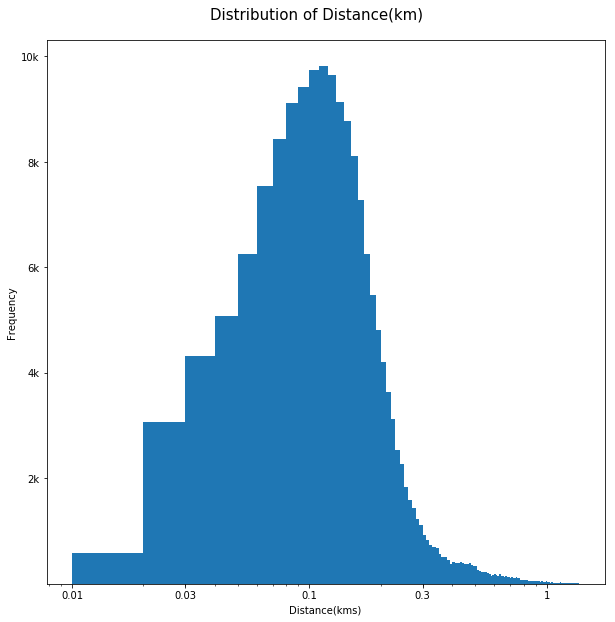

In [15]:
bins=np.arange(0,np.log10(bike_sanjose['duration_hrs'].max()+0.01),0.01)
plt.figure(figsize=[10,10])
plt.hist(data=bike_sanjose,x='duration_hrs',bins=bins);
plt.xscale('log')
ticks=[0.01,0.03,0.1,0.3,1]
plt.xticks((ticks),ticks);
plt.yticks([2e3,4e3,6e3,8e3,1e4],['2k','4k','6k','8k','10k'])
plt.xlabel('Distance(kms)',fontsize=10);
plt.ylabel('Frequency',fontsize=10);
plt.suptitle('Distribution of Distance(km)',y=0.91,verticalalignment='baseline', fontsize = 15);

## Monthly Usage Trend of Bicycle Riders  

### The plot below shows that in San Jose July-2019 had approximately 13000 bike rides made. This really good for the company. We can also see that countplot is multimodal as we can see drops in December and January; May be because of holiday season

In [16]:
##Sorting the data
bike_sort=bike_sanjose.sort_values(by='year_month')

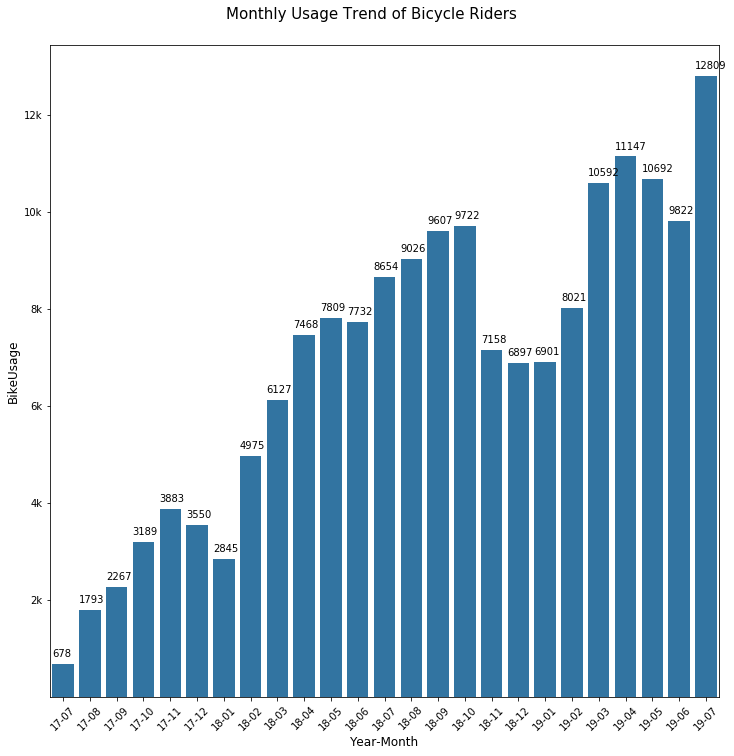

In [27]:
##Creeating a plot
color=sb.color_palette()[0]
plt.figure(figsize=[12,12])
ax=sb.countplot(data=bike_sort,x='year_month',color=color);
plt.xlabel("Year-Month",fontsize=12);
plt.ylabel("BikeUsage",fontsize=12);
plt.suptitle("Monthly Usage Trend of Bicycle Riders ",y=0.91,verticalalignment='baseline', fontsize = 15);
plt.yticks([2e3,4e3,6e3,8e3,1e4,12e3],['2k','4k','6k','8k','10k','12k']);
plt.xticks(rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0,i.get_height()+150,i.get_height())

## Yearly,Monthly and WeekDay Trend of Bike Usage By Gender

### From the chart below we can see that the We have more Male Users over the years and months. We can see that their number is increasing at a steady pace. We can also see that the working days has highest number of bicycle riders unlike the weekends

Text(0.5,0.98,'Yearly,Monthly and WeekDay Trend of Bike Usage By Gender')

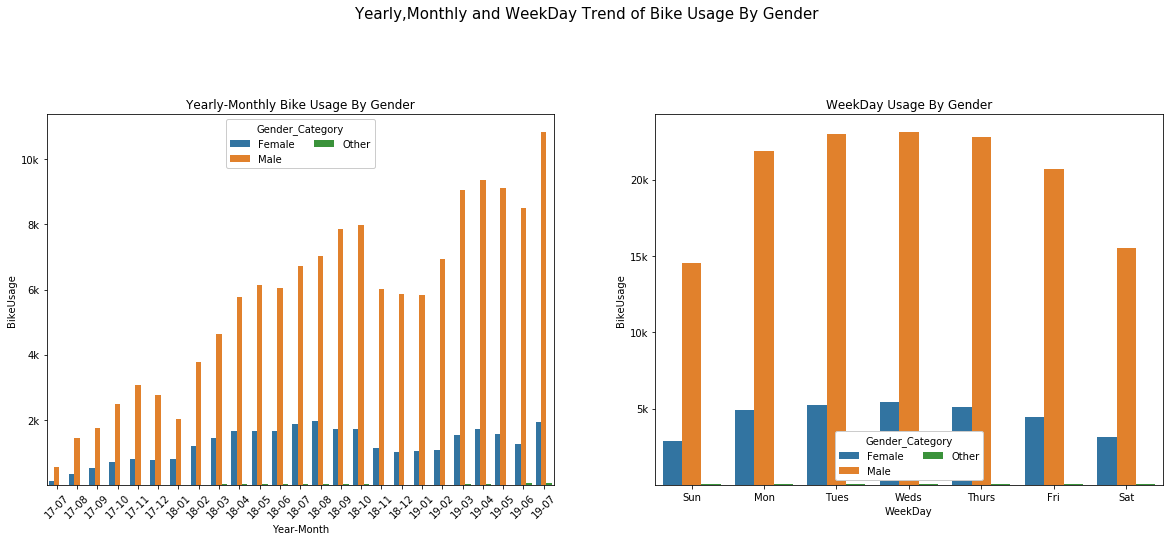

In [18]:
plt.figure(figsize=[20,15])
plt.subplot(221)
order=['Sun','Mon','Tues','Weds','Thurs','Fri','Sat']
ax=sb.countplot(data=bike_sort,x='year_month',hue='member_gender');
plt.title("Yearly-Monthly Bike Usage By Gender")
plt.xlabel("Year-Month")
plt.ylabel("BikeUsage")
plt.xticks(rotation=45)
plt.yticks([2e3,4e3,6e3,8e3,1e4],['2k','4k','6k','8k','10k'])
ax.legend(loc=9,ncol=2,framealpha=1,title="Gender_Category")
plt.subplot(222)
ax=sb.countplot(data=bike_sort,x='day_of_week',hue='member_gender',order=order);
plt.title("WeekDay Usage By Gender")
plt.xlabel("WeekDay")
plt.ylabel("BikeUsage")
plt.yticks([5e3,1e4,15e3,2e4],['5k','10k','15k','20k'])
ax.legend(loc=8,ncol=2,framealpha=1,title="Gender_Category")
plt.suptitle("Yearly,Monthly and WeekDay Trend of Bike Usage By Gender",fontsize=15)

## Yearly,Monthly Usage Trend of the Bike Users from Age <70

### In the plot below we can see that 20-40 has drastically increased. It shows good pattern for the company. We can see that people in thier 30's to 50's should use the bicycle more. The company should focus on that age group to make it easier for the users of that age to use the bike in San Jose

In [19]:
##Filtering the data by people under 70
group1=bike_sort[bike_sort['member_age']<70].groupby(['age_range','year_month']).count()['bike_id']

In [20]:
group1=group1.reset_index(name='usage')

In [21]:
group1=group1.sort_values(by='year_month')

Text(0.5,0.91,'Year-Month Bike Usage by Age Group')

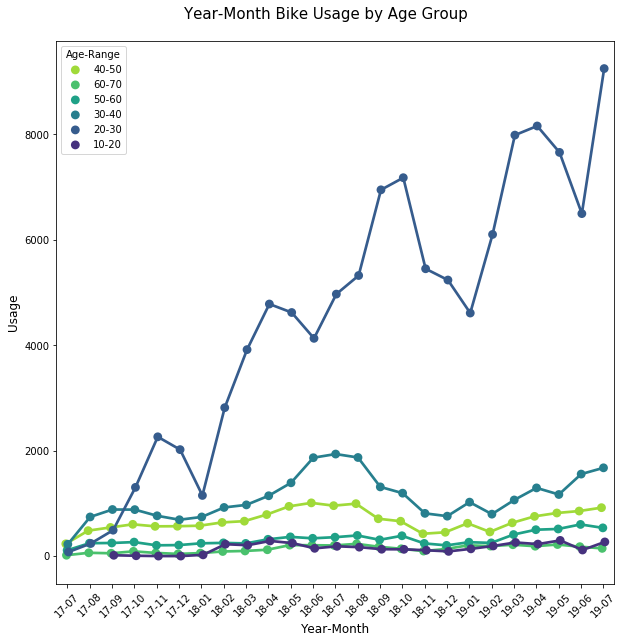

In [22]:
plt.figure(figsize=[10,10])
g=sb.pointplot(data=group1,x="year_month",y="usage",hue="age_range",ci=None,dodge=True,palette='viridis_r');
plt.xticks(rotation=45)
ax=g.legend()
ax.set_title("Age-Range")
plt.xlabel("Year-Month",fontsize=12)
plt.ylabel("Usage",fontsize=12)
plt.suptitle("Year-Month Bike Usage by Age Group",y=0.91,verticalalignment='baseline', fontsize = 15)

## Hourly Bike Sharing Trend by Customers and Subsribers 

### That's a good sign we can see that in San Jose all most of the Subscribers share their bikes for work. We can see that customers don't share their Bikes for work. Most of the Bike Usage for Customers and Subscribers is between 17 to 18 hrs


In [23]:
bike_Customer=bike_sort[bike_sort['user_type']=='Customer']
group2=bike_Customer.groupby(['hour','user_type','bike_share_for_all_trip']).count()['bike_id']
group2=group2.reset_index(name='usage')
group2=group2.sort_values(by='hour')

In [24]:
bike_Customer=bike_sort[bike_sort['user_type']=='Subscriber']
group3=bike_Customer.groupby(['hour','user_type','bike_share_for_all_trip']).count()['bike_id']
group3=group3.reset_index(name='usage')
group3=group3.sort_values(by='hour')

Text(0,0.5,'Usage')

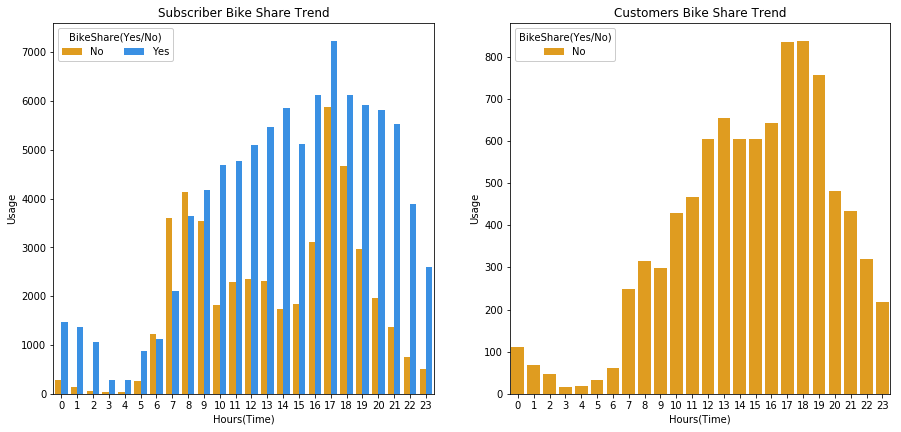

In [25]:
##Plotting
plt.figure(figsize=[15,15])
plt.subplot(221)
ax=sb.barplot(data=group3,x="hour",y="usage",hue="bike_share_for_all_trip",palette=['orange','dodgerblue']);
plt.title("Subscriber Bike Share Trend")
ax.legend(loc=2,ncol=2,framealpha=1,title="BikeShare(Yes/No)")
plt.xlabel("Hours(Time)")
plt.ylabel("Usage")
plt.subplot(222)
ax=sb.barplot(data=group2,x="hour",y="usage",hue="bike_share_for_all_trip",palette=['orange','dodgerblue']);
plt.title("Customers Bike Share Trend")
ax.legend(loc=2,ncol=2,framealpha=1,title="BikeShare(Yes/No)")
plt.xlabel("Hours(Time)")
plt.ylabel("Usage")